# DS 3000 - Practicum 2

**Student Name**: Olivia Simpson, Samuel Baldwin, Rhea Kallely, Alec Kavaliauskas

**Date**: 10/25/2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

**Question**  In this practicum, you will work with data from the Federal Aviation Administration Wildlife Strike DatabaseLinks to an external site. which contains records of reported strikes to civil aircraft in the United States from 1990 to 2024. These incidents have resulted in the loss of lives and machinery. Various analyses shows increased incidents are attributed to environmental factors, changes to wildlife population, increases in the number of aircraft, among other factors.

The dataset contains aircraft, and a description of the wildlife incident that occurred. The data contains approximately 100 fields but I guarantee that you will only need about 15% of those columns. After reviewing the requirements for the practicum, you are welcome and encourage to drop any columns that are not needed for your analysis. For more information on the dataset and to learn more about the description of the fields, visit the following websiteLinks to an external site..

**Question 1** 

In your own words, formulate the Data Science problem that you were given.

The task involves analyzing data from the Federal Aviation Administration (FAA) Wildlife Strike Database, which records incidents where wildlife—primarily birds—strikes civil aircraft in the U.S. between 1990 and 2023. The analysis aims to uncover patterns and trends in these incidents, focusing on their frequency, geographic distribution, and impact on aviation safety. Key elements to investigate include annual changes in incidents, common wildlife species involved, and damage caused during different phases of flight. The data also allows for examining environmental or operational factors contributing to strike increases over time. Ultimately, the goal is to identify significant trends that could inform strategies to reduce future wildlife strikes.

**Question 2** 

Load the data using pandas and inspect it.

1. Perform the initial inspection of the data, its shape, types, etc.
2. Evaluate the dataset and perform at least three type of data preparation and justify the approach that is taken to prepare the data for analysis. Data prep can include, but is not limited to: handling missing values, data types, duplicates, etc. You will need to ensure that your data preparation addressed issues in at least 7 fields in the data.
3. Prepare meaningful* summary statistics for at least 3 continuous and 3 categorical fields.
Note: meaningful summary statistics explains the statistical summary of relevant fields in a coherent manner.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats

bird_df = pd.read_csv('Downloads/Bird_Strikes_1990_2023.csv')

/var/folders/0t/8mmw8dy91zs2390fk2krwnj40000gn/T/ipykernel_28302/816912428.py:7: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  bird_df = pd.read_csv('Downloads/Bird_Strikes_1990_2023.csv')


In [5]:
# remove unecessary columns 
bird_df = bird_df.drop(columns = ['STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 
                        'STR_ENG1', 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 
                        'STR_ENG3', 'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4', 'ING_ENG4', 
                        'INGESTED_OTHER', 'STR_PROP', 'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 
                        'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG', 'STR_TAIL', 'DAM_TAIL', 'STR_OTHER', 
                        'DAM_OTHER', 'OTHER_SPECIFY', 'SKY', 'WARNED', 'COST_REPAIRS', 'COST_OTHER', 
                        'COST_REPAIRS', 'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ', 'REPORTED_NAME', 
                        'REPORTED_TITLE', 'SOURCE', 'PERSON', 'NR_INJURIES', 'ENG_3_POS', 'ENG_4_POS',
                        'NR_FATALITIES', 'LUPDATE', 'TRANSFER', 'ENG_1_POS', 'ENG_2_POS', 
                        'RUNWAY', 'AMA', 'AMO', 'EMA', 'EMO', 'COMMENTS', 'OPID', 'REMARKS',
                        'AIRPORT_ID', 'PRECIPITATION', 'STR_LGHTS', 'DAM_LGHTS', 'EFFECT', 'EFFECT_OTHER', 
                        'REMAINS_COLLECTED', 'REMAINS_SENT', 'SIZE', 'AIRPORT', 'LOCATION', 'ENROUTE_STATE', 
                        'OPERATOR', 'REG', 'FLT', 'AC_CLASS', 'AC_MASS', 'TYPE_ENG', 'NUM_ENGS'])

In [6]:
bird_df.isna().sum()
#around half of all time values are missing, but it takes up too much of our data to remove, really not sure what to do

INDEX_NR                 0
INCIDENT_DATE            0
INCIDENT_MONTH           0
INCIDENT_YEAR            0
TIME                125177
TIME_OF_DAY         122416
LATITUDE             35501
LONGITUDE            35502
STATE                35501
FAAREGION            35501
AIRCRAFT                 0
PHASE_OF_FLIGHT     110967
HEIGHT              140003
SPEED               194573
DISTANCE            100576
AOS                 274614
INDICATED_DAMAGE         0
DAMAGE_LEVEL        101495
BIRD_BAND_NUMBER    288420
SPECIES_ID               4
SPECIES                  1
NUM_SEEN            194037
NUM_STRUCK             636
dtype: int64

In [7]:
bird_df.loc[bird_df['HEIGHT'].isna(), 'HEIGHT'] = bird_df['HEIGHT'].mean().round()
bird_df.loc[bird_df['DISTANCE'].isna(), 'DISTANCE'] = bird_df['DISTANCE'].mean().round()
bird_df.loc[bird_df['SPEED'].isna(), 'SPEED'] = bird_df['SPEED'].mean().round()
bird_df.dropna(subset=['DAMAGE_LEVEL'], inplace=True)
bird_df.dropna(subset=['PHASE_OF_FLIGHT'], inplace=True)

In [8]:
bird_df['DAMAGE_LEVEL'].describe()

count     158419
unique         5
top            N
freq      141031
Name: DAMAGE_LEVEL, dtype: object

In [9]:
bird_df.head(10)

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,LATITUDE,LONGITUDE,STATE,FAAREGION,...,SPEED,DISTANCE,AOS,INDICATED_DAMAGE,DAMAGE_LEVEL,BIRD_BAND_NUMBER,SPECIES_ID,SPECIES,NUM_SEEN,NUM_STRUCK
2,608244,7/1/1996,7,1996,NaN,NaN,41.30252,-95.89417,NE,ACE,...,143.0,0.0,NaN,False,N,NaN,UNKBM,Unknown bird - medium,NaN,1
3,608245,7/1/1996,7,1996,NaN,NaN,38.94453,-77.45581,DC,AEA,...,143.0,1.0,NaN,False,N,NaN,UNKBM,Unknown bird - medium,NaN,1
4,608246,7/1/1996,7,1996,NaN,NaN,40.77724,-73.87261,NY,AEA,...,143.0,1.0,NaN,True,M,NaN,UNKBM,Unknown bird - medium,NaN,1
5,608247,5/6/1991,5,1991,NaN,Day,29.53369,-98.46978,TX,ASW,...,100.0,0.0,NaN,False,N,NaN,UNKBM,Unknown bird - medium,1,1
6,608248,11/5/1993,11,1993,NaN,Dawn,39.29761,-94.71391,MO,ACE,...,220.0,1.0,NaN,True,M?,NaN,UNKBM,Unknown bird - medium,More than 100,11-100
7,608249,7/2/1995,7,1995,NaN,NaN,39.29761,-94.71391,MO,ACE,...,143.0,0.0,NaN,False,N,NaN,UNKBM,Unknown bird - medium,NaN,1
9,608251,5/3/1992,5,1992,NaN,Day,37.36186,-121.92901,CA,AWP,...,143.0,0.0,NaN,False,N,NaN,Z6007,American robin,1,1
10,608253,8/7/1990,8,1990,20:25,Night,38.74769,-90.35999,MO,ACE,...,70.0,1.0,NaN,True,M,NaN,UNKBL,Unknown bird - large,1,1
11,608254,9/7/1990,9,1990,NaN,Day,33.36996,-81.96450,GA,ASO,...,100.0,0.0,NaN,False,N,NaN,UNKBS,Unknown bird - small,2-10,2-10
12,608255,4/14/1995,4,1995,NaN,Day,31.32737,-92.54856,LA,ASW,...,65.0,1.0,NaN,False,N,NaN,ZT1,Blackbirds,1,1


In [10]:
bird_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158419 entries, 2 to 288808
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   INDEX_NR          158419 non-null  int64  
 1   INCIDENT_DATE     158419 non-null  object 
 2   INCIDENT_MONTH    158419 non-null  int64  
 3   INCIDENT_YEAR     158419 non-null  int64  
 4   TIME              115236 non-null  object 
 5   TIME_OF_DAY       142890 non-null  object 
 6   LATITUDE          152738 non-null  float64
 7   LONGITUDE         152737 non-null  float64
 8   STATE             152738 non-null  object 
 9   FAAREGION         152738 non-null  object 
 10  AIRCRAFT          158419 non-null  object 
 11  PHASE_OF_FLIGHT   158419 non-null  object 
 12  HEIGHT            158419 non-null  float64
 13  SPEED             158419 non-null  float64
 14  DISTANCE          158419 non-null  float64
 15  AOS               12283 non-null   float64
 16  INDICATED_DAMAGE  158419 

In [11]:
bird_df['HEIGHT'] = bird_df['HEIGHT'].astype(int)
bird_df['DISTANCE'] = bird_df['DISTANCE'].astype(int)
bird_df['SPEED'] = bird_df['SPEED'].astype(int)

**Question 3** 

Perform an in-depth analysis by creating visualizations to understand the distribution and relationships within the data, while ensuring that your analysis and explanation of the results tell a story. It's important to select appropriate visualizations based on the type of data. Explain all results.

1. Analyze the proportion of incidents that occur each year.
2. Evaluate the distribution of bird strikes in each state and display the top 20 states.
3. What is the most common bird species that are involved in bird strikes.
4. Perform a comparative analysis of the annual aircraft damage for each phase of flight. Evaluate the results over the last 10 years to determine what patterns exist. Note: this requires a year over year analysis.
5. Analyze the frequency of bird strike incidents that occur on a monthly basis over the last 10 years. Analyze the results to determine when these incidents are more prevalent.  This question requires you to drill deeper into the analysis to determine if the distribution has changed over the last 10 years. Note: this requires a year over year analysis.
6. Perform ONE (1) additional analysis on the distribution. Ensure that you either : 1) perform a comparative analysis by evaluating 3 or more groups within the data or 2) perform a temporal analysis of the patterns over 10 or more years (this requires a year over year analysis of the patterns). Do not repeat any of the previous analysis.


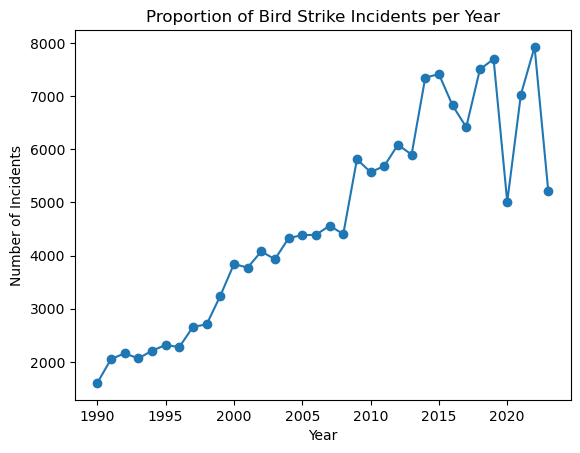

In [13]:
# 3.1 Analyze the proportion of incidents that occur each year.
import matplotlib.pyplot as plt

# Find number of incidents per year
yearly_incidents = bird_df.groupby('INCIDENT_YEAR').size()

# Plot the proportion of incidents per year
plt.plot(yearly_incidents.index, yearly_incidents.values, marker='o')
plt.title('Proportion of Bird Strike Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

This chart shows the number of plane bird strike incidents each year since 1990. There is a strong positive trend upward since 1990, only taking major dips in 2020 and 2021, which was likely due to there being less planes in the sky due to COVID, and 2023, which is because the data is incomplete for 2023, ending in August. The upward trend is likely due to more flights every year and more incidents being reported.

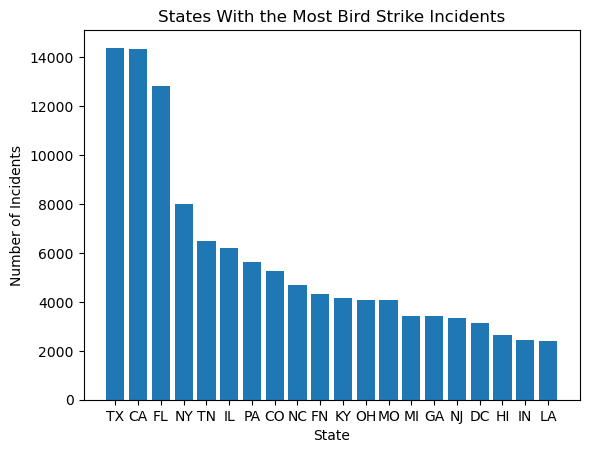

In [15]:
# 3.2 Evaluate the distribution of bird strikes in each state and display the top 20 states.

# Group by state and count occurrences
incidents_by_state = bird_df.groupby('STATE').size()

# Sort and get top 20 states
top_20_states = incidents_by_state.nlargest(20)

# Plot the top 20 states
plt.bar(top_20_states.index, top_20_states.values)
plt.title('States With the Most Bird Strike Incidents')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.show()

This chart shows the states with the most reported plane bird strike incidents since 1990. The states with the most strikes are Texas with just shy of 25,000, followed by Florida and California with about 20,000 each. It is notable that these are also some of the largest states in the USA by both land area and population, so there are likely the most flights in these areas, leading to more bird strikes.

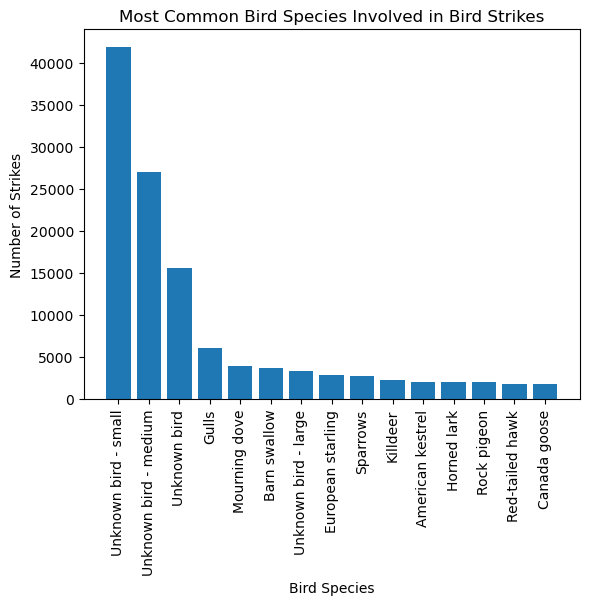

In [17]:
# 3.3 What is the most common bird species that are involved in bird strikes.

# Group by bird species and count occurrences
incidents_by_species = bird_df.groupby('SPECIES').size()

# Sort and find the top species
top_species = incidents_by_species.nlargest(15)

# Plot the most common bird species
plt.bar(top_species.index, top_species.values)
plt.title('Most Common Bird Species Involved in Bird Strikes')
plt.xlabel('Bird Species')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=90)
plt.show()

This chart shows the most common reported bird species involved in bird strikes on planes starting in the year 1990. This chart demonstrates that most of the time, it is unknown what the specie of the bird is, with the largest 3 categories by a significant amount all being unknown birds of different sizes. Small unknown birds are the most common making up close to 50,000 of the incidents, followed by medium sized birds being responsible for almost 40,000 of the incidents. The most common known specie of bird in an incident is a mourning dove making up around 15,000 of the incidents, followed by Barn swallows being the second most common known bird, making up about 10,000 of the incidents. There is a large distribution of birds that are responsible for incidents, as we can see that the bottom 11 bird species on this chart are all responsible for relatively similar number of incidents.

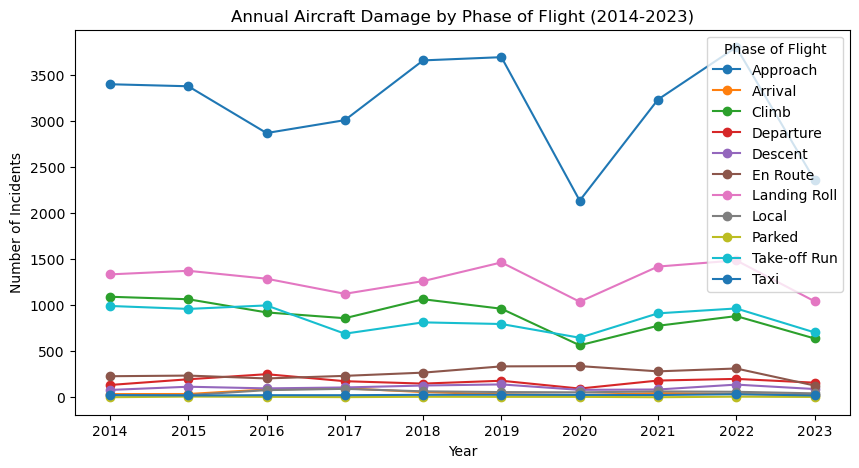

In [19]:
# 3.4 Perform a comparative analysis of the annual aircraft damage for each phase of flight. Evaluate the results over the last 10 years 
# to determine what patterns exist. Note: this requires a year over year analysis.

# Filter for the last 10 years
ten_years_ago = bird_df['INCIDENT_YEAR'].max() - 9
last_10_years = bird_df[bird_df['INCIDENT_YEAR'] >= ten_years_ago]

# Get years for x axis
years = last_10_years['INCIDENT_YEAR'].unique()

# Group by year and phase of flight and get counts
damage_by_phase = last_10_years.groupby(['INCIDENT_YEAR', 'PHASE_OF_FLIGHT'])['INDEX_NR'].count().unstack()

# Create multi line plot with line for each phase of flight and number of incidents yearly
damage_by_phase.plot(kind='line', figsize=(10,5), marker='o')
plt.title('Annual Aircraft Damage by Phase of Flight (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(years)
plt.legend(title='Phase of Flight')
plt.show()

This graph shows the number of incidents for each phase of flight over the past 10 years (2014-2023). It is clear that the dominant phase of flight for incidents in approach, with landing roll being consistently the second highest. Take-off run and climb switch for 3rd and 4th most common phase of flight for incidents to occur. Significantly less incidents occur during the other phases of flight. Yearly, there is not much difference in which phase of flight is the most common, though we can see the clear dips in 2020 and 2023 which were apparent in the proportion of bird strikes each year graph.

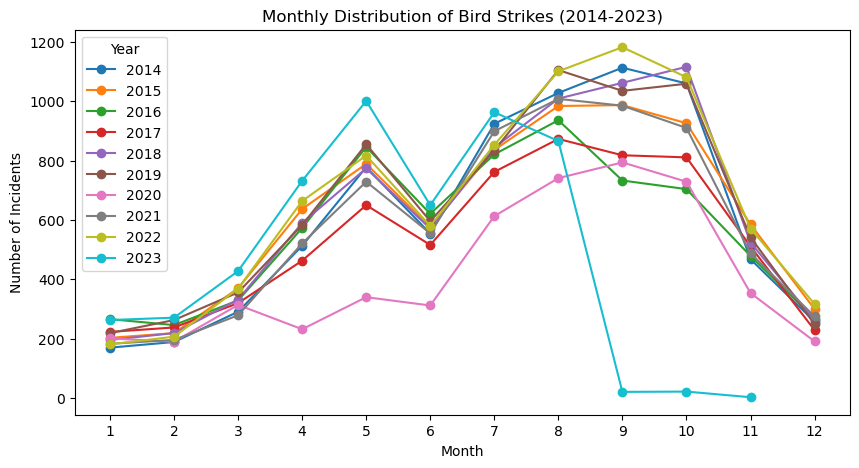

In [21]:
# 3.5 Analyze the frequency of bird strike incidents that occur on a monthly basis over the last 10 years. 
# Analyze the results to determine when these incidents are more prevalent.  This question requires you to drill deeper into the analysis 
# to determine if the distribution has changed over the last 10 years. Note: this requires a year over year analysis.
# source - https://stackoverflow.com/questions/67022165/how-to-plot-multiple-lines-based-on-index-of-the-dataframe

# Group by month and year and get counts for each month in each year
year_month = last_10_years.groupby(['INCIDENT_MONTH', 'INCIDENT_YEAR'])['INDEX_NR'].count().unstack()

# Get months for x axis
months = last_10_years['INCIDENT_MONTH'].unique()

# Create multi line plot with line for each year and number of incidents over each month
year_month.plot(kind='line', figsize=(10,5), marker='o')
plt.title('Monthly Distribution of Bird Strikes (2014-2023)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(months)
plt.legend(title='Year')
plt.show()

This chart shows the frequency of bird strike incidents that occur on a monthly basis over the last 10 years (2014-2023). The glaring difference in this data is 2023, which should be interpreted with a grain of salt as clearly not all of the data for the final third of the year is in the dataset yet. Across the other years there are clear increases in the late summer and early fall months (7,8,9,10) and in May which is interesting. This is likely due to higher bird activity during these months and more people flying during the summer, leading to more flights and more incidents. Additionally there is an overall dip in the winter as well, likely due to less bird activity. There is not much difference between the years, each seeming to follow the same trends. 2020 had a dip in April due to COVID, and there does seem to be the same trend of more recent years having more incidents, again likely due to more flights.

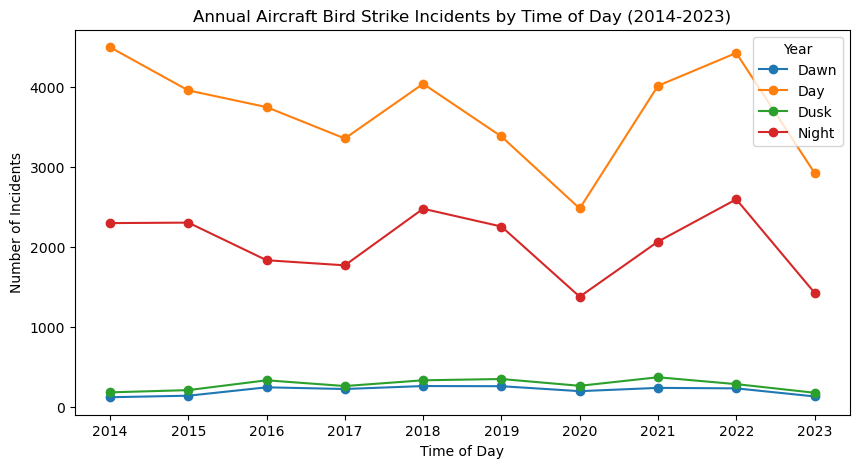

In [23]:
# 3.6 Perform ONE (1) additional analysis on the distribution. Ensure that you either : 1) perform a comparative analysis by evaluating 3 or more groups within the data or 2)
# perform a temporal analysis of the patterns over 10 or more years (this requires a year over year analysis of the patterns). Do not repeat any of the previous analysis.

# Group by year and time of day
aircraft_class = last_10_years.groupby(['INCIDENT_YEAR', 'TIME_OF_DAY'])['INDEX_NR'].count().unstack()

# Create a multi line plot with number of incidents by time of day yearly
aircraft_class.plot(kind='line', figsize=(10,5), marker='o')
plt.title('Annual Aircraft Bird Strike Incidents by Time of Day (2014-2023)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.xticks(years) # years from previous cell
plt.legend(title='Year')
plt.show()

This graph shows the annual aircraft bird strike incidents by time of day over the last 10 years (2014-2023). It is clear that most bird strike incidents occur during the day, followed by at night. Dusk and Dawn are the least prevelant time of day for bird strike incidents, though they interestingly have very similar numbers of incidents. This graph is likely more telling about how many flights there are at each time of day and less so about bird activity, and that most flights happen during the day, followed by at night. There does not seem to be a major correlation between year and which time of day is most prevelant for bird strike incidents, though we can see the 2020 COVID dip and the 2023 unfinished data dip in this graph as well.

**Question 4: Hypothesis Testing**

Perform pairwise analysis of select features and evaluate the significance of the pattern or trend. A suitable value for alpha is 5%. Explain all results.

1. Create a scatterplot that shows the relationship between aircraft height and speed. Evaluate the correlation, the strength and the significance of the results.
2. Visualize the distribution of the aircraft speed during: 1) the approach phase of flight and 2) the landing roll phase of flight. Perform a 2 sample t-test and evaluate if there is a statistical difference between the speed during these two flight phases. Tip: if the data is skewed, you will need to address this prior to the statistical analysis.
3. Create a visualization of the aircraft damage grouped by phase of flight.
Evaluate if the results are statistically significant. Ensure that you use the appropriate test
4. Perform ONE (1) additional statistical test.
Explain what you are testing and the reason this information is useful.
Visualize the data, state the hypothesis and explain if it is statistically significant.
 

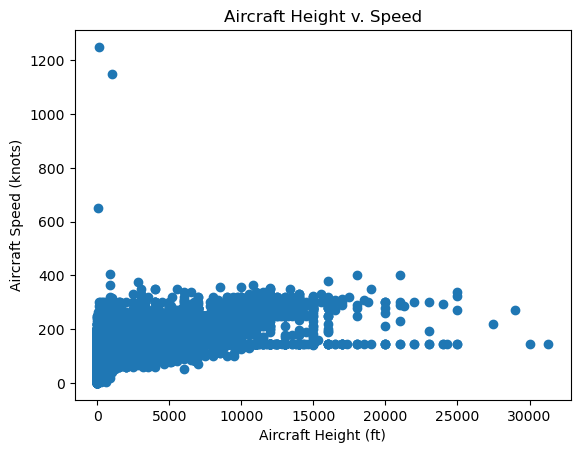

Correlation between Height and Speed: 0.60


In [26]:
# 4.1 Create a scatterplot that shows the relationship between aircraft height and speed. 
# Evaluate the correlation, the strength and the significance of the results.

# creates scatter plot 
plt.scatter(bird_df['HEIGHT'], bird_df['SPEED'])
plt.title('Aircraft Height v. Speed')
plt.xlabel('Aircraft Height (ft)')
plt.ylabel('Aircraft Speed (knots)')
plt.show()

# finds correlation between the height and speed 
correlation = bird_df['HEIGHT'].corr(bird_df['SPEED'])
print(f"Correlation between Height and Speed: {correlation:.2f}")

The correlation is not significant (0.59 > 0.05), and we can conclude that there is not a significant relationship between height and speed. 

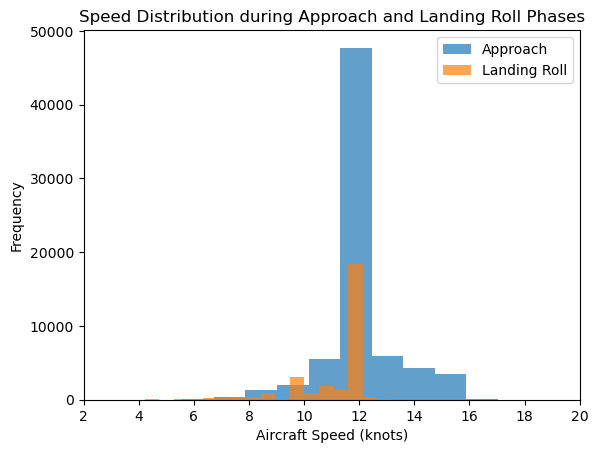

T-statistic: 91.97, P-value: 0.0000
There is a statistically significant difference between the two phases.


In [28]:
# 4.2 Visualize the distribution of the aircraft speed during: 
# 1) the approach phase of flight and 2) the landing roll phase of flight. 
# Perform a 2 sample t-test and evaluate if there is a statistical difference between the speed during these two flight phases. 
# Tip: if the data is skewed, you will need to address this prior to the statistical analysis.

# calculates speeds for approaching and landing phases 
approach_speed = bird_df[bird_df['PHASE_OF_FLIGHT'] == 'Approach']['SPEED']
landing_speed = bird_df[bird_df['PHASE_OF_FLIGHT'] == 'Landing Roll']['SPEED']

# visualizes data 
plt.hist(np.sqrt(approach_speed), alpha=0.7, label='Approach', bins=30)
plt.hist(np.sqrt(landing_speed), alpha=0.7, label='Landing Roll', bins=30)
plt.title('Speed Distribution during Approach and Landing Roll Phases')
plt.xlabel('Aircraft Speed (knots)')
plt.ylabel('Frequency')
plt.xlim(2, 20)
plt.legend()
plt.show()

# runs 2 sample t test 
t_stat, p_value = stats.ttest_ind(np.sqrt(approach_speed), np.sqrt(landing_speed), equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05: 
    print("There is a statistically significant difference between the two phases.")
else:
    print("No statistically significant difference between the 2 phases.")

The 2 sample t-test indicated that there is a statistically significant difference between the speed during these 2 flight phases. This means that the speed at the approach phase and landing roll phase is, on average, different. The chart also shows us that there is a greater frequency of approach flights. 

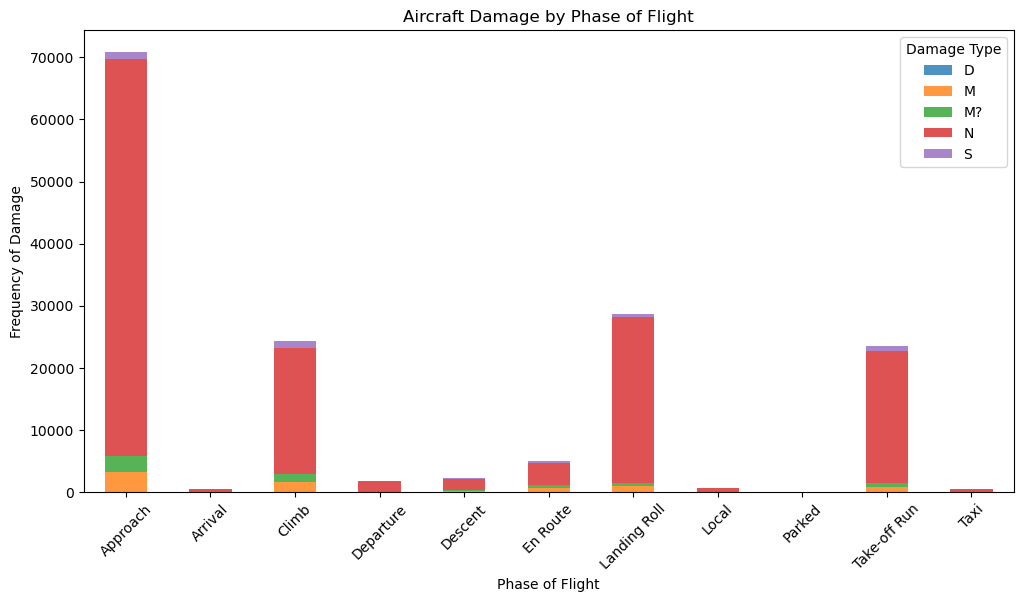

Chi-square Statistic: 5070.97, P-value: 0.0000


In [30]:
# 4.3 Create a visualization of the aircraft damage grouped by phase of flight. 
# Evaluate if the results are statistically significant. Ensure that you use the appropriate test

from scipy.stats import chi2_contingency

# creates contingency table 
damage_phase = pd.crosstab(bird_df['PHASE_OF_FLIGHT'], bird_df['DAMAGE_LEVEL'])

# visualizes the data 
damage_phase.plot(kind='bar', stacked=True, alpha=0.8, figsize=(12, 6))
plt.title('Aircraft Damage by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Frequency of Damage')
plt.xticks(rotation=45)
plt.legend(title='Damage Type')
plt.show()

# runs chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(damage_phase)
print(f"Chi-square Statistic: {chi2_stat:.2f}, P-value: {p_value:.4f}")

We chose to use a chi-square statistic because it allows us to see if 2 categories of data are statistically related. Our calculated p-value was less than 0.05, so we can reject the null hypothesis. This means that there is a significant association between the phase of flight and damage level. 

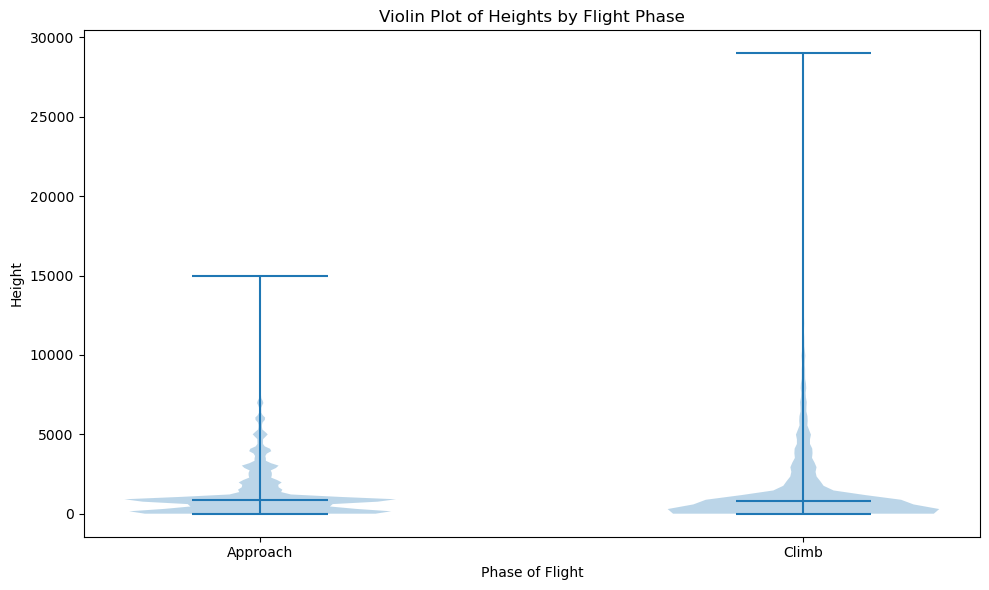

U-Statistic: 916536963.50, P-value: 0.0000
There is a statistically significant difference between the two phases.


In [32]:
# Perform ONE (1) additional statistical test. Explain what you are testing and the reason this information is useful.
# Visualize the data, state the hypothesis and explain if it is statistically significant.

# find height for approach and climb phase 
approach_height = bird_df[bird_df['PHASE_OF_FLIGHT'] == 'Approach']['HEIGHT']
climb_height = bird_df[bird_df['PHASE_OF_FLIGHT'] == 'Climb']['HEIGHT']

# Visualize the data 
plt.figure(figsize=(10, 6))
plt.violinplot([approach_height, climb_height], showmeans=False, showmedians=True)
plt.xticks([1, 2], ['Approach', 'Climb'])
plt.title('Violin Plot of Heights by Flight Phase')
plt.ylabel('Height')
plt.xlabel('Phase of Flight')

# Display the plots
plt.tight_layout()
plt.show()

# run Mann-Whitney U test 
u_stat, p_value = stats.mannwhitneyu(approach_height.dropna(), climb_height.dropna())

print(f"U-Statistic: {u_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05: 
    print("There is a statistically significant difference between the two phases.")
else:
    print("No statistically significant difference between the 2 phases.")

We decided to run a Mann-Whitney U test to compare 2 independent phases to determine if they are related to each other. This is valuable information because approach is when the plane is about to land (decreasing height) and climb is when it is taking off (increasing height), so it should be assumed that the 2 phases would be related to each other (plane change height around the same time to do the same mechanism). Our hypothesis was: there is no difference in the distribution of heights. The p-value is less than 0.05, so there is strong evidence that there is a statistically significant difference between the 2 phases. 

**Question 5: Statistical Modeling**

Explore a simple linear relationship within the data and create a model to predict the occurrence of bird strikes in a given FAA region. Ensure that you explain all results.

1. Extract all data for the AWP FAA Region and use a line chart to visualize the frequency of incidents between 1990 and 2015 inclusive.
2. Using the extracted data above, create a simple linear regression model and predicts the incidents for 2016 and 2017.
(a) Display the r-squared and what this indicates about your model's ability to fit the data.
(b) Visualize the dataset from (1) and include the predicted results for 2016 and 2017.
(c) Compare and contrast the predictions for 2016 and 2017 with the actual values.
3. Perform predictions for 2018 through to 2020. Explain what transpired when your model was used to predict this time period. Comment on the reliability of your model.

*Tip: It is important to remember that you are creating a simple linear regression model, which is limited in features and does not include information about all factors 
that influence the frequency of bird strikes. Keep this in mind while framing your response and explanations.

In [35]:
#filter the data for AWP region between 1990 and 2015
awp_data = bird_df[(bird_df['FAAREGION'] == 'AWP') & (bird_df['INCIDENT_YEAR'].between(1990, 2015))]

#check data make sure its right
print(awp_data.head())

    INDEX_NR INCIDENT_DATE  INCIDENT_MONTH  INCIDENT_YEAR TIME TIME_OF_DAY  \
9     608251      5/3/1992               5           1992  NaN         Day   
16    608259     7/13/1990               7           1990  NaN         Day   
18    608261     4/28/1995               4           1995  NaN         NaN   
20    608263      2/5/1991               2           1991  NaN        Dusk   
36    608281     4/30/1995               4           1995  NaN         NaN   

    LATITUDE  LONGITUDE STATE FAAREGION  ... SPEED DISTANCE  AOS  \
9   37.36186 -121.92901    CA       AWP  ...   143        0  NaN   
16  33.94254 -118.40807    CA       AWP  ...   125        0  NaN   
18  37.61900 -122.37484    CA       AWP  ...   140        0  NaN   
20  38.69542 -121.59077    CA       AWP  ...   120        1  NaN   
36  33.94254 -118.40807    CA       AWP  ...   143        9  NaN   

    INDICATED_DAMAGE  DAMAGE_LEVEL  BIRD_BAND_NUMBER  SPECIES_ID  \
9              False             N               NaN  

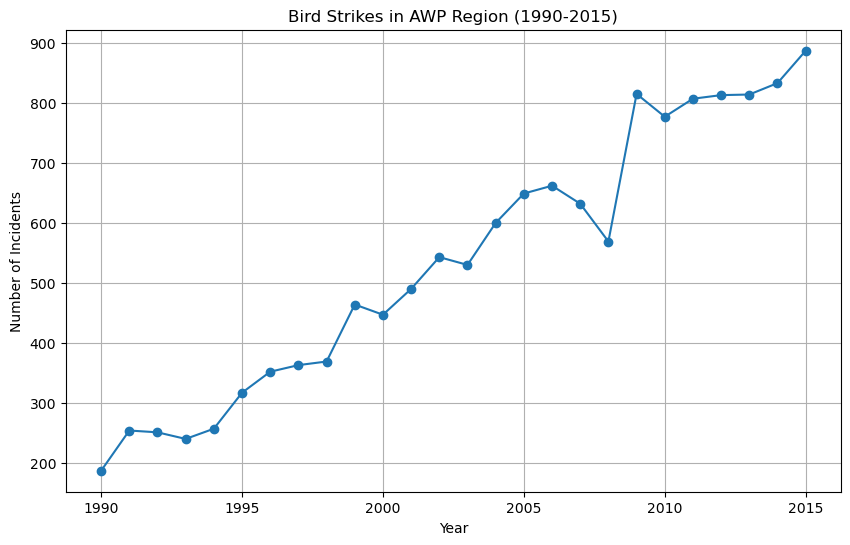

In [36]:
#group the data by year and count the incidents
awp_yearly = awp_data.groupby('INCIDENT_YEAR').size()

#plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(awp_yearly.index, awp_yearly.values, marker='o')
plt.title('Bird Strikes in AWP Region (1990-2015)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()
#this graph shows a strong linear relationship between  # incidents and year

In [37]:
#https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html
#using this documentation
# Prepare data for the model
# num of incidents
X = np.array(awp_yearly.index).reshape(-1, 1)
#years
y = awp_yearly.values

#create linear regression model
model = LinearRegression()
model.fit(X, y)

#predict for 2016 and 2017
predictions = model.predict([[2016], [2017]])
print('Predicted incidents for 2016 and 2017:', predictions)

Predicted incidents for 2016 and 2017: [919.19384615 947.61846154]


In [38]:
#find r squared
r_squared = model.score(X, y)
print('R-squared:', r_squared)
#this r squared value of .95 shows a very strong positive relationship

R-squared: 0.9679442511872373


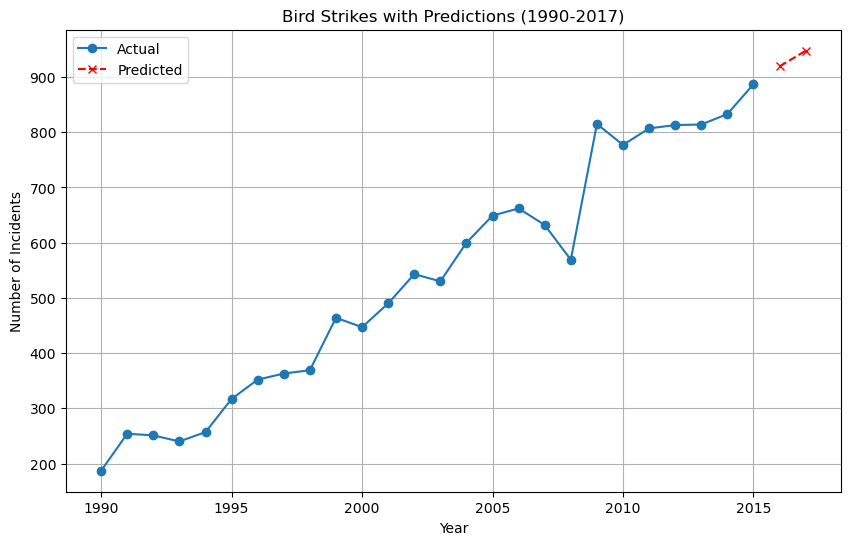

In [39]:
#extend the years for prediction
future_years = np.array([2016, 2017])
future_preds = model.predict(future_years.reshape(-1, 1))

#plot the historical data and predictions
plt.figure(figsize=(10, 6))
plt.plot(awp_yearly.index, awp_yearly.values, marker='o', label='Actual')
plt.plot(future_years, future_preds, marker='x', linestyle='--', color='red', label='Predicted')
plt.title('Bird Strikes with Predictions (1990-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
#predict for 2018-2020
future_years_extended = np.array([2018, 2019, 2020])
future_preds_extended = model.predict(future_years_extended.reshape(-1, 1))

#display predictions
print('Predictions for 2018-2020:', future_preds_extended)

Predictions for 2018-2020: [ 976.04307692 1004.46769231 1032.89230769]


**Question 6**

This analysis provided a comprehensive exploration of bird strike incidents involving aircraft from 1990 to 2023, identifying key trends, patterns, and statistical relationships. Firstly, the analysis revealed a clear upward trend in bird strikes over the years, with dips during 2020 and 2021 attributed to reduced flights during COVID and incomplete data for 2023. Second, incidents were most frequent during flight phases such as approach and landing roll, and there was a significant seasonal pattern, with higher bird strikes during late summer and fall, likely due to increased bird activity and flight frequency. Lastly, statistical testing confirmed that flight phase is significantly related to aircraft damage, and the linear regression model showed high predictive accuracy (R² = 0.97), effectively forecasting incidents up to 2020, though predictions beyond that period require cautious interpretation.

**Question 7 — OPTIONAL**

This optional bonus question requires that you perform an geospatial analysis on bird strikes and visualize the results using a map. Examples include (but you are not limited to):

Mapping bird strike incidents: visualize the locations of bird strike incidents to identify hot spots or patterns
Heat maps: create heat maps to show the density of bird strike incidents in different areas.
Proximity Analysis: analyze the proximity of bird strikes to airports or landmarks
etc
Ensure that you clearly indicate the analysis that you are performing and provide detailed steps to explain ALL findings from your analysis.

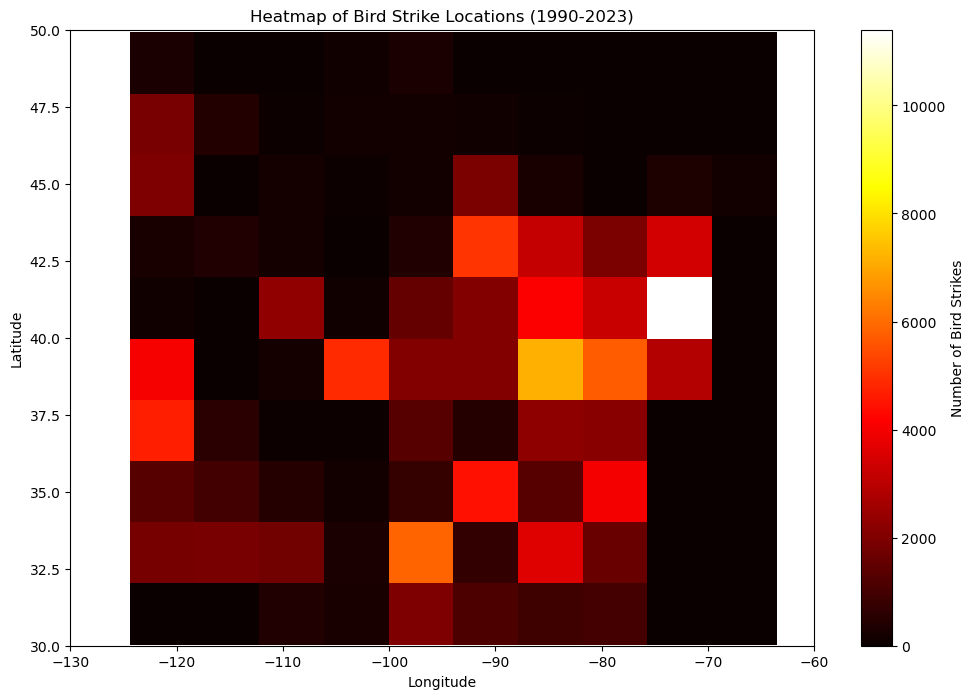

In [43]:
# get rid of null values for latitude and longitude 
bird_df = bird_df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# set a max and min for within the US and filter the data 
lat_min, lat_max = 30.0, 50.0 
lon_min, lon_max = -130.0, -60.0

filter_df = bird_df[(bird_df['LATITUDE'] >= lat_min) & (bird_df['LATITUDE'] <= lat_max) &
(bird_df['LONGITUDE'] >= lon_min) & (bird_df['LONGITUDE'] <= lon_max)]

# visualize using a heat map 
plt.figure(figsize=(12, 8))
plt.hist2d(filter_df['LONGITUDE'], filter_df['LATITUDE'], bins=[10, 10], cmap='hot')
plt.colorbar(label='Number of Bird Strikes')
plt.title('Heatmap of Bird Strike Locations (1990-2023)')
plt.xlabel('Longitude') 
plt.ylabel('Latitude')
plt.xlim(-130, -60)
plt.ylim(30, 50)
plt.show()

We created a heat map of where the bird strikes occuring (using latitude and longitude). We see a high amount of strikes around the midwest (between -70 through -80 longitude and 38 through 43 latitude). Around the east coast, we see a very low bird strike count and continued high amount of bird strikes throughout the rest of the midwest. On the west coast, there are some strikes, near the middle of the coast. 